<a href="https://colab.research.google.com/github/Francesfahey/BigData/blob/main/fifaCA26_4_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
fifa_df = pd.read_csv('https://raw.githubusercontent.com/Francesfahey/BigData/main/fifa.csv', index_col=0)
print(fifa_df.head())


                           name   rating  position   height    foot   rare  \
id                                                                           
1001               Gábor Király       69        GK      191   Right      0   
100143             Frederik Boi       65         M      184   Right      0   
100264          Tomasz Szewczuk       57         A      185   Right      0   
100325   Steeve Joseph-Reinette       63         D      180    Left      0   
100326             Kamel Chafni       72         M      181   Right      0   

        pace  shooting  passing  dribbling  defending  heading  diving  \
id                                                                       
1001                                                                70   
100143    61        65       63         59         62       62           
100264    65        54       43         53         55       74           
100325    68        38       51         46         64       71           
100326   

In [ ]:

pace = fifa_df[' pace']
print(pace)



In [ ]:
position = fifa_df[' position']
print(position)

In [ ]:
rating = fifa_df[' rating']
print(rating)

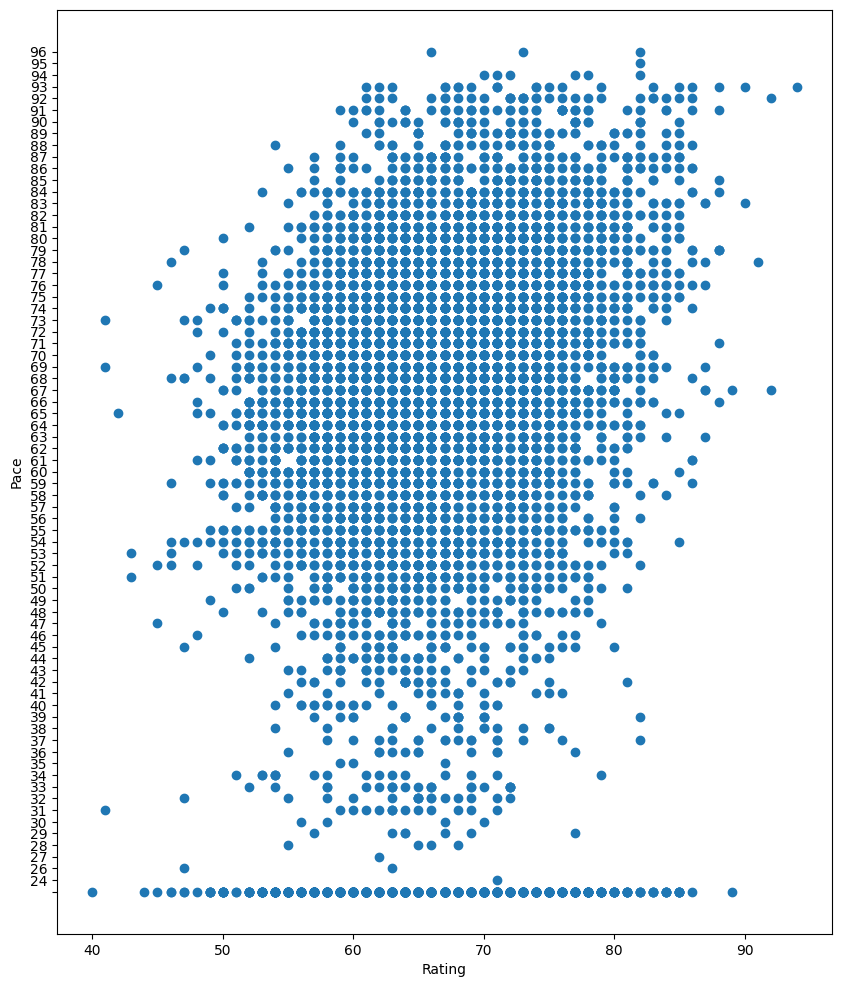

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

rating = fifa_df[' rating'].to_numpy()
pace = fifa_df[' pace'].to_numpy()

sort_indices = np.argsort(pace)
rating_sorted = rating[sort_indices]
pace_sorted = pace[sort_indices]

# plot the results
fig, ax = plt.subplots(figsize=(10, 12))  # specify the figure size
ax.scatter(rating_sorted, pace_sorted)
ax.set_xlabel('Rating')
ax.set_ylabel('Pace')
plt.show()


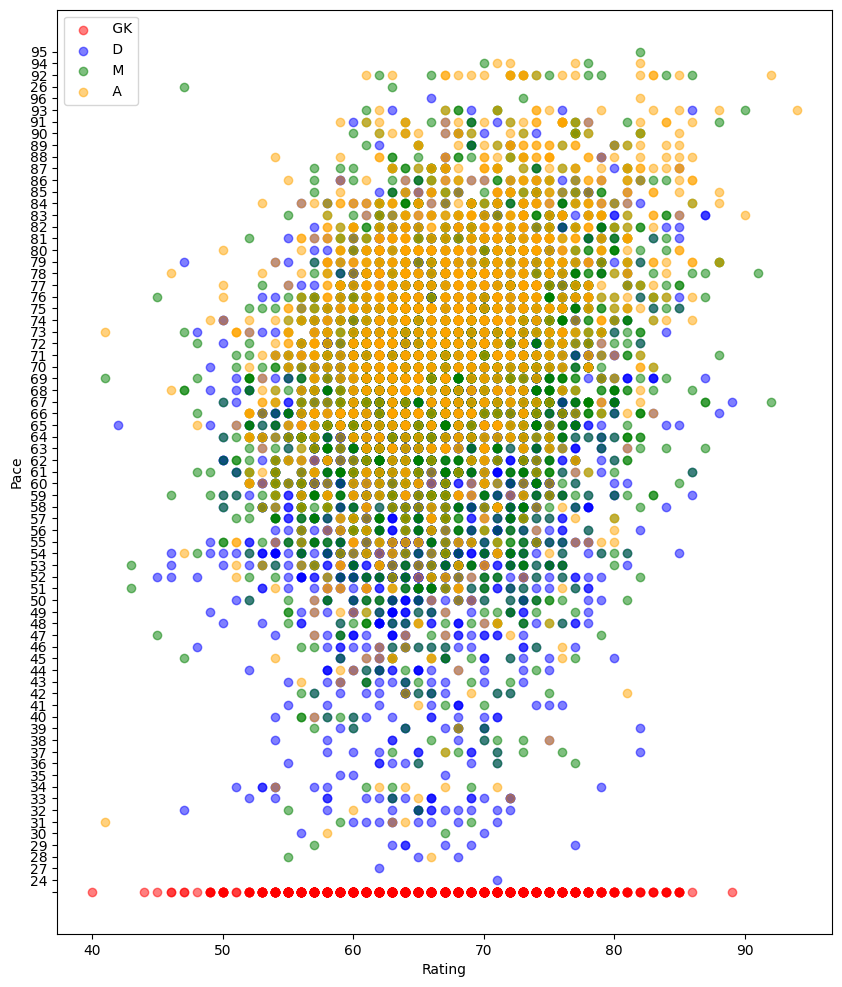

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Select the 'pace', 'rating', and 'position' columns
pace_rating_position_df = fifa_df[[' pace', ' rating', ' position']]

# Sort the data by 'pace'
pace_rating_position_df = pace_rating_position_df.sort_values(by=' pace')

# Create a dictionary to map each position to a color
position_colours = {' GK': 'red', ' D': 'blue', ' M': 'green', ' A': 'orange'}

# Create a scatter plot with different colors for each position
fig, ax = plt.subplots(figsize=(10, 12))

for position, color in position_colours.items():
    data = pace_rating_position_df[pace_rating_position_df[' position'] == position]
    ax.scatter(data[' rating'], data[' pace'], c=color, label=position, alpha=0.5)

# Add axis labels and a legend
ax.set_xlabel('Rating')
ax.set_ylabel('Pace')
ax.legend()

# Show the plot
plt.show()
 

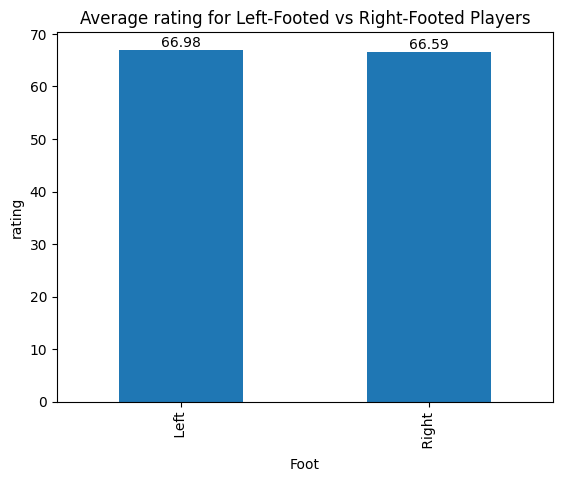

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by foot, and calculate the mean rating for each group
foot_groups = fifa_df.groupby(' foot')[' rating'].mean()

# Plot a bar chart to compare the average rating for left-footed and right-footed players
foot_groups.plot(kind='bar')
plt.title('Average rating for Left-Footed vs Right-Footed Players')
plt.xlabel('Foot')
plt.ylabel('rating')

#add values to the graph
for index, value in enumerate(foot_groups):
    plt.annotate(str(round(value, 2)), xy=(index, value), ha='center', va='bottom')


plt.show()


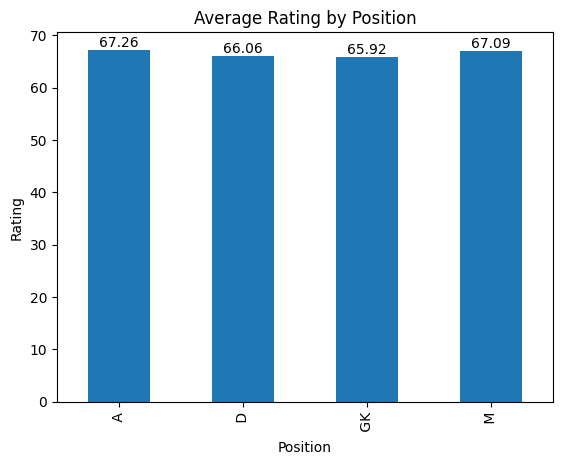

In [ ]:
import matplotlib.pyplot as plt

#Group the data by position and calculate the mean rating for each position
position_groups = fifa_df.groupby(' position')[' rating'].mean()

#Plot a bar chart to compare the average rating for each position
position_groups.plot(kind='bar')
plt.title('Average Rating by Position')
plt.xlabel('Position')
plt.ylabel('Rating')

#add values to the graph
for index, value in enumerate(position_groups):
    plt.annotate(str(round(value, 2)), xy=(index, value), ha='center', va='bottom')


plt.show()

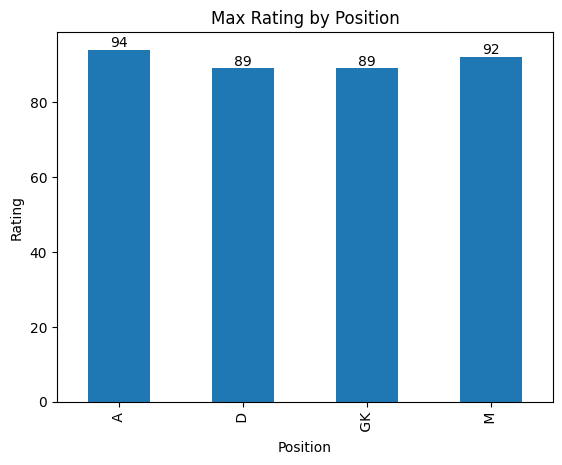

In [ ]:
import matplotlib.pyplot as plt

#Group the data by position and calculate the max rating for each position
position_groups = fifa_df.groupby(' position')[' rating'].max()

#Plot a bar chart to compare the max rating for each position
position_groups.plot(kind='bar')
plt.title('Max Rating by Position')
plt.xlabel('Position')
plt.ylabel('Rating')

for index, value in enumerate(position_groups):
    plt.annotate(str(value), xy=(index, value), ha='center', va='bottom')

plt.show()

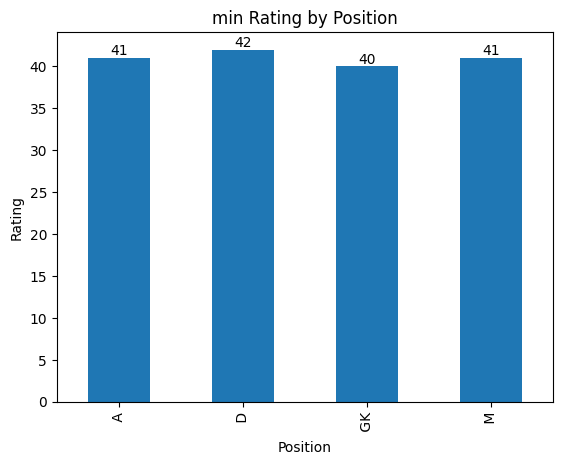

In [ ]:
import matplotlib.pyplot as plt

#Group the data by position and calculate the min rating for each position
position_groups = fifa_df.groupby(' position')[' rating'].min()

#Plot a bar chart to compare the min rating for each position
position_groups.plot(kind='bar')
plt.title('min Rating by Position')
plt.xlabel('Position')
plt.ylabel('Rating')

for index, value in enumerate(position_groups):
    plt.annotate(str(value), xy=(index, value), ha='center', va='bottom')

plt.show()

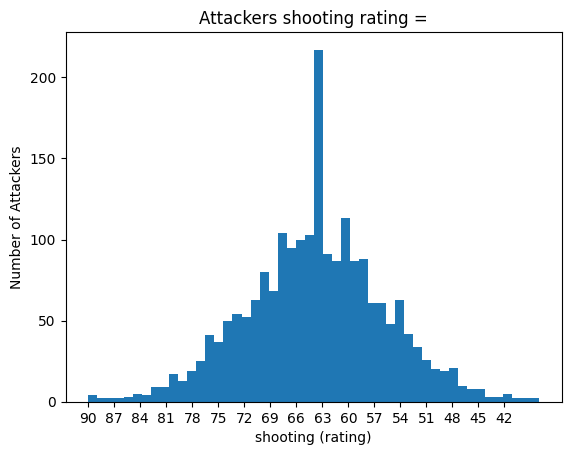

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_A = fifa_df[fifa_df[' position'] == ' A']
df_A_sorted = df_A.sort_values(by=' shooting', ascending=False)

plt.hist(df_A_sorted[' shooting'], bins=50)

plt.title("Attackers shooting rating =")
plt.xlabel("shooting (rating)")
plt.ylabel("Number of Attackers")

plt.xticks(range(0, 50, 3))

plt.show()

<ipython-input-51-8e020f93c524>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fifa_df[' shooting'], shade=True)


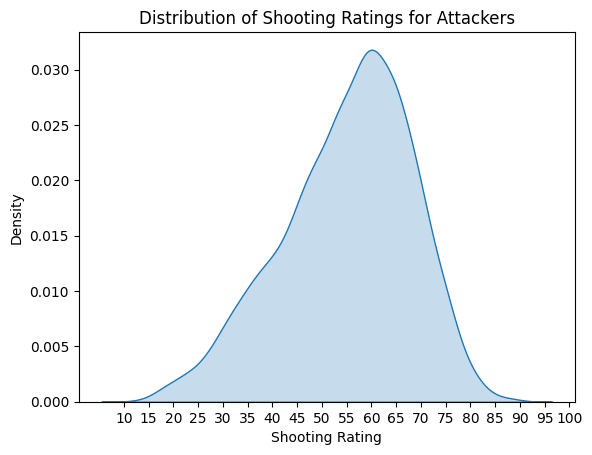

In [51]:
import seaborn as sns

# Convert the 'shooting' column to numeric data type, handle errors gracefully
fifa_df[' shooting'] = pd.to_numeric(fifa_df[' shooting'], errors='coerce')

# Create a KDE plot of the shooting ratings
sns.kdeplot(fifa_df[' shooting'], shade=True)

# Set the title, x-axis label, and y-axis label
plt.title('Distribution of Shooting Ratings for Attackers')
plt.xlabel('Shooting Rating')
plt.ylabel('Density')

plt.xticks(range(10, 105, 5))

plt.show()


In [52]:
attackers = fifa_df[fifa_df[' position'] == ' A']
average_shooting_rating = attackers[' shooting'].mean()
print("The average shooting of an attacker is:", average_shooting_rating)

The average shooting of an attacker is: 63.75984630163305


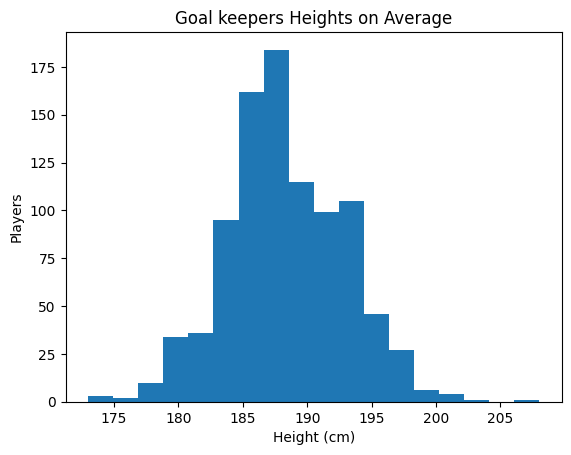

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_gk = fifa_df[fifa_df[' position'] == ' GK']

plt.hist(df_gk[' height'], bins=18)

plt.title("Goal keepers Heights on Average")
plt.xlabel("Height (cm)")
plt.ylabel("Players")

plt.show()

<ipython-input-45-19bb780c158d>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fifa_df[' height'], shade=True)


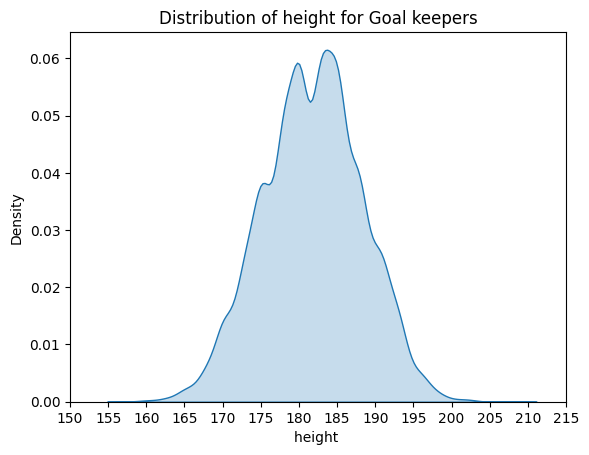

In [45]:
import seaborn as sns

# Convert the 'height' column to numeric data type
fifa_df[' height'] = pd.to_numeric(fifa_df[' height'])

# Create a KDE plot of the height ratings
sns.kdeplot(fifa_df[' height'], shade=True)

# Set the title, x-axis label, and y-axis label
plt.title('Distribution of height for Goal keepers')
plt.xlabel('height ')
plt.ylabel('Density')

plt.xticks(range(150, 220, 5))

plt.show()

In [ ]:
goalkeepers = fifa_df[fifa_df[' position'] == ' GK']
average_height = goalkeepers[' height'].mean()
print("The average height of a Goalkeeper is:", average_height)

The average height of a Goalkeeper is: 188.23333333333332


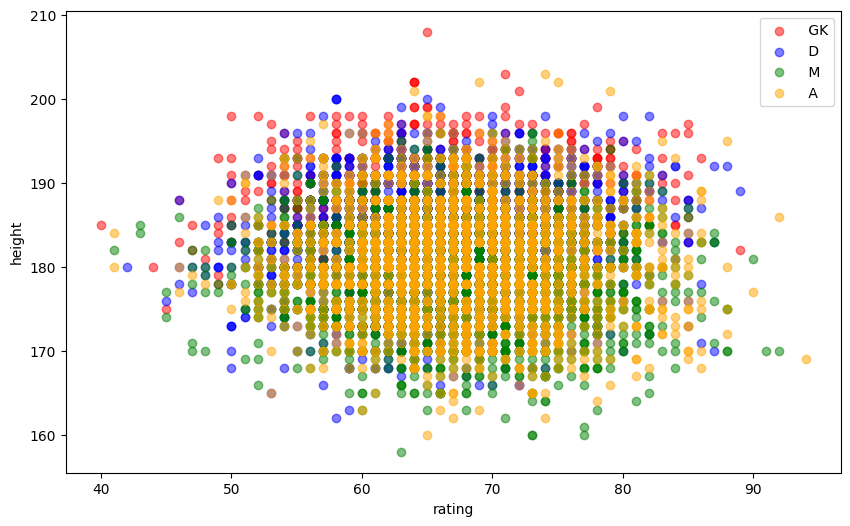

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Select the 'height', 'rating', and 'position' columns
height_rating_position_df = fifa_df[[' height', ' rating', ' position']]

# Create a dictionary to map each position to a color
position_colors = {' GK': 'red', ' D': 'blue', ' M': 'green', ' A': 'orange'}

# Create a scatter plot with different colors for each position
fig, ax = plt.subplots(figsize=(10, 6))

for position, color in position_colors.items():
    data = height_rating_position_df[height_rating_position_df[' position'] == position]
    ax.scatter(data[' rating'], data[' height'], c=color, label=position, alpha=0.5)

# Add axis labels and a legend
ax.set_xlabel('rating')
ax.set_ylabel('height')
ax.legend()

# Show the plot
plt.show()

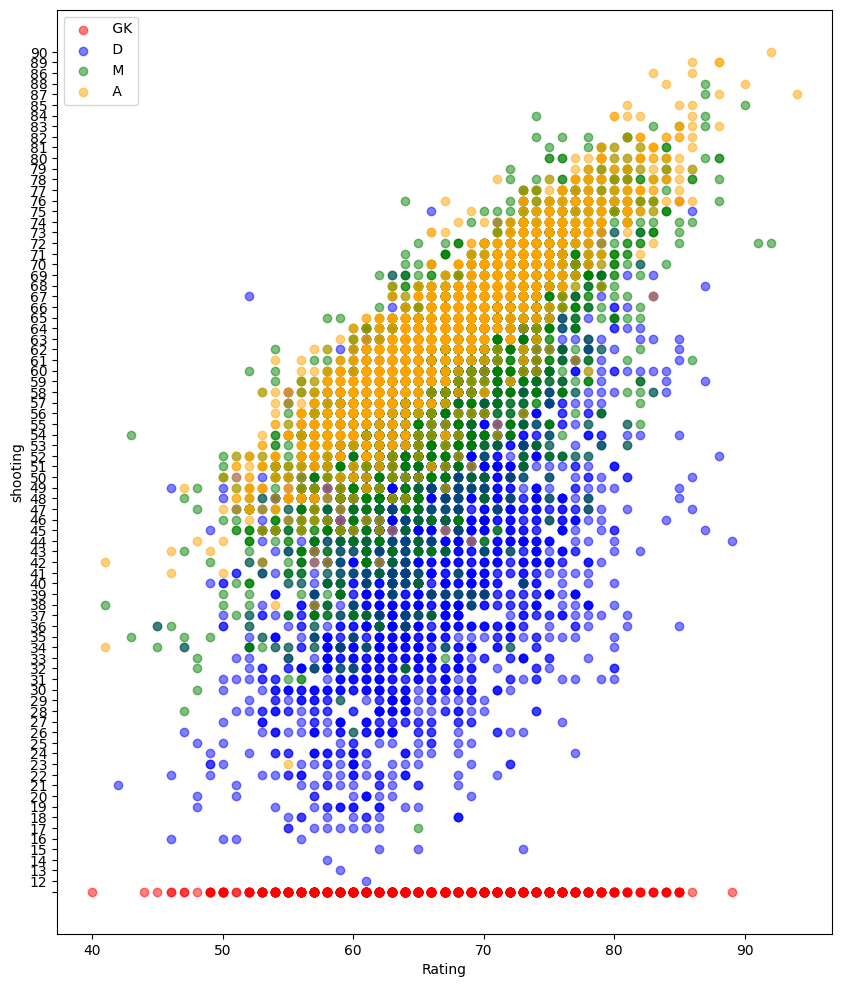

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Select the 'shooting', 'rating', and 'position' columns
pace_rating_position_df = fifa_df[[' shooting', ' rating', ' position']]

# Sort the data by 'shooting'
pace_rating_position_df = pace_rating_position_df.sort_values(by=' shooting')

# Create a dictionary to map each position to a color
position_colours = {' GK': 'red', ' D': 'blue', ' M': 'green', ' A': 'orange'}

# Create a scatter plot with different colors for each position
fig, ax = plt.subplots(figsize=(10, 12))

for position, color in position_colours.items():
    data = pace_rating_position_df[pace_rating_position_df[' position'] == position]
    ax.scatter(data[' rating'], data[' shooting'], c=color, label=position, alpha=0.5)

# Add axis labels and a legend
ax.set_xlabel('Rating')
ax.set_ylabel('shooting')
ax.legend()

# Show the plot
plt.show()

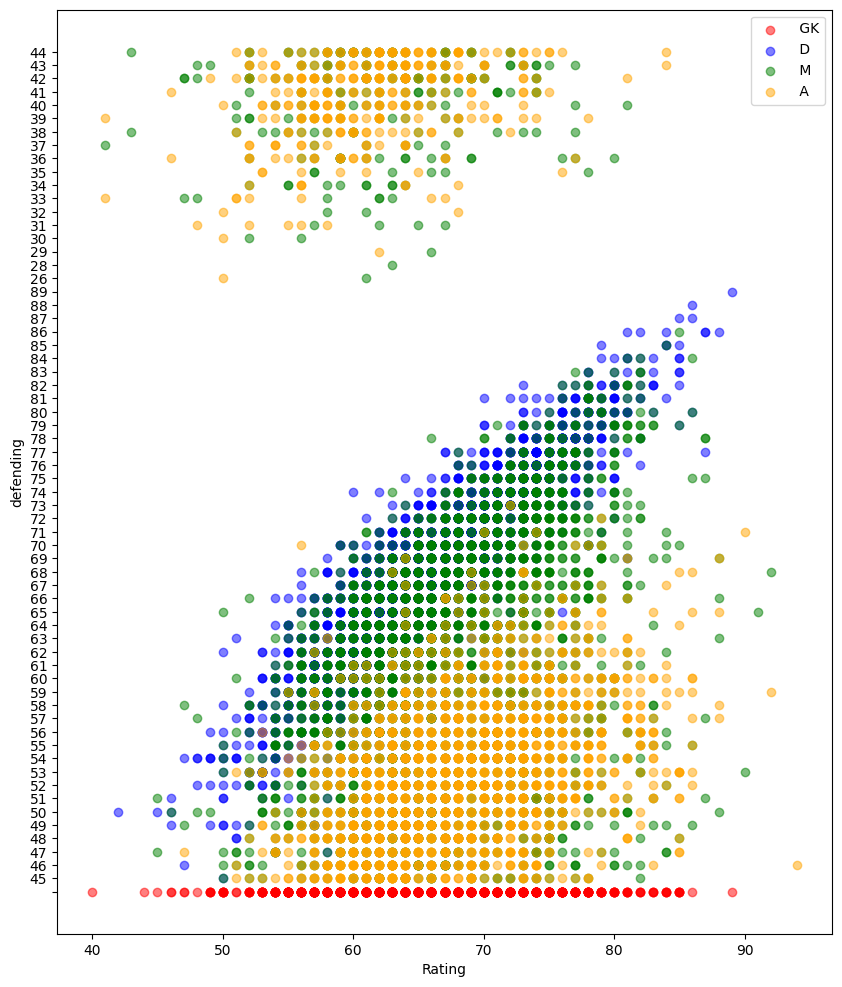

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Select the 'defending', 'rating', and 'position' columns
defending_rating_position_df = fifa_df[[' defending', ' rating', ' position']]

# Sort the data by 'defending'
defending_rating_position_df = defending_rating_position_df.sort_values(by=' defending')

# Create a dictionary to map each position to a color
position_colours = {' GK': 'red', ' D': 'blue', ' M': 'green', ' A': 'orange'}

# Create a scatter plot with different colors for each position
fig, ax = plt.subplots(figsize=(10, 12))

for position, color in position_colours.items():
    data = defending_rating_position_df[defending_rating_position_df[' position'] == position]
    ax.scatter(data[' rating'], data[' defending'], c=color, label=position, alpha=0.5)

# Add axis labels and a legend
ax.set_xlabel('Rating')
ax.set_ylabel('defending')
ax.legend()

# Show the plot
plt.show()

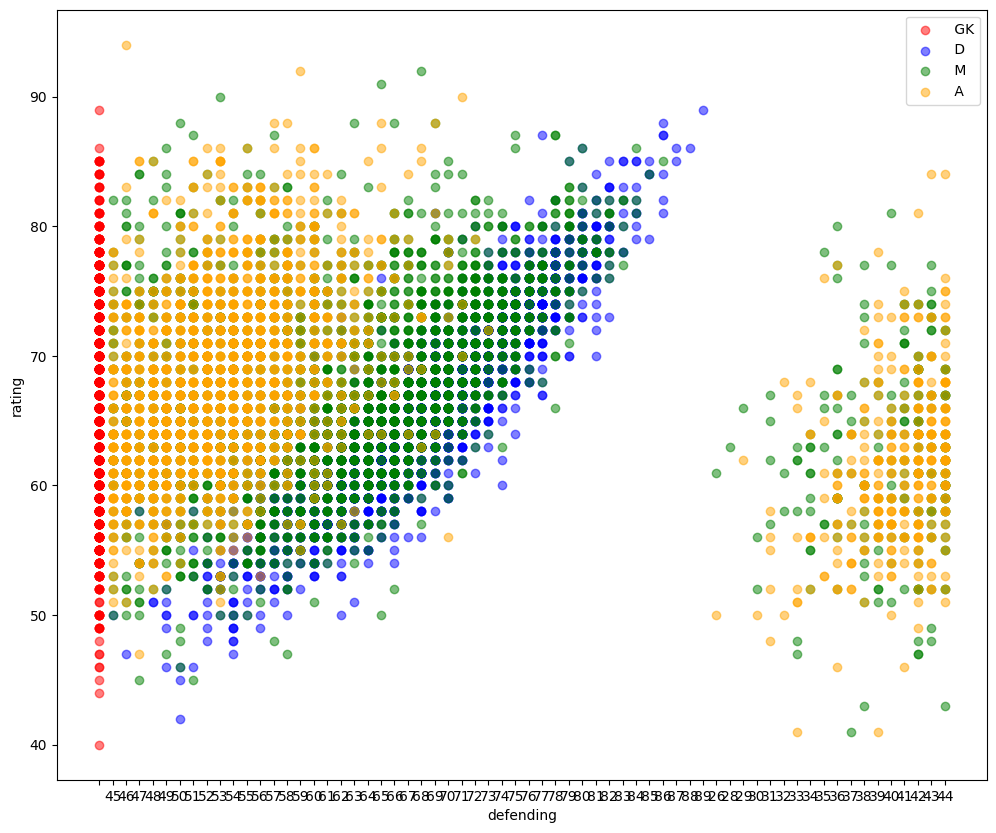

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Select the 'defending', 'rating', and 'position' columns
defending_rating_position_df = fifa_df[[' defending', ' rating', ' position']]

# Sort the data by 'defending'
defending_rating_position_df = defending_rating_position_df.sort_values(by=' defending')

# Create a dictionary to map each position to a color
position_colours = {' GK': 'red', ' D': 'blue', ' M': 'green', ' A': 'orange'}

# Create a scatter plot with different colors for each position
fig, ax = plt.subplots(figsize=(12, 10))

for position, color in position_colours.items():
    data = defending_rating_position_df[defending_rating_position_df[' position'] == position]
    ax.scatter(data[' defending'], data[' rating'], c=color, label=position, alpha=0.5)

# Add axis labels and a legend
ax.set_xlabel('defending')
ax.set_ylabel('rating')
ax.legend()

# Show the plot
plt.show()